# Example Dataset Exploration

This notebook is a simple example of how to explore the provided dataset.

### Required Imports
The following cell must always be run prior to any other cell in this notebook. It imports all necessary libraries and database objects.

In [1]:
import sys

# import database schema and helper functions
from db import *

# import seaborn/matplot settings
from analysis import *

### Extract a Table
Return all rows from a table as a DataFrame.

In [2]:
data = session.query(Languages)
query_to_df(data)[:5]

,name_short,name,joshi_et_al,common_crawl_pages,common_crawl_percent
id,,,,,
1,af,afrikaans,3,250103,0.0090
2,am,amharic,2,88665,0.0032
3,co,corsican,1,58251,0.0021
4,en,english,5,1268287767,45.5105
5,haw,hawaiian,1,14241,0.0005


### Extract the Query String
Use this to explore a query from another tool, such as DataGrip.

In [3]:
data = session.query(Languages)
print(str(to_sql(data)))

SELECT languages.id, languages.name_short, languages.name, languages.joshi_et_al, languages.common_crawl_pages, languages.common_crawl_percent 
FROM languages


### Query String to DataFrame
Use this to run a query from another tool, such as DataGrip, and return the results as a DataFrame.

In [4]:
sql = """
select * 
from translated_prompts
where id = 339;
"""
data = session.query(TranslatedPrompts).from_statement(text(sql))
query_to_df(data)

,prompt_translation,prompt_translation_hash,prompt_id,language_id
id,,,,
339,None,"b""\xe39\xc3\xac<' \x88\xc1\\\x91\xe7\x1c\x8e\x...",3,9


### Perform Complex Joins
Join together multiple tables using the SQLAlchemy ORM.

In [ ]:
data = (
    session.query(ImageCreationRequest)
        .join(TranslatedPrompts, ImageCreationRequest.translated_prompt_id == TranslatedPrompts.id)
        .join(Languages, TranslatedPrompts.language_id == Languages.id)
        .filter(Languages.name_short == 'en')
        .order_by(asc(ImageCreationRequest.id))
    )
query_to_df(data)[:5]

,success,model,request_start,request_end,reported_created,response_time,timing_valid,revised_prompt,status_code,error,revised_prompt_hash,prompt_id,translated_prompt_id,prompt_prefix_id,image_id
id,,,,,,,,,,,,,,,
1093,False,dalle-3,1.712247e+09,1.712247e+09,NaN,4.150611,False,None,None,None,None,None,127,1,NaN
1094,False,dalle-3,1.712247e+09,1.712247e+09,NaN,3.479894,False,None,None,None,None,None,128,1,NaN
1095,False,dalle-3,1.712247e+09,1.712247e+09,NaN,3.287417,False,None,None,None,None,None,129,1,NaN
1096,False,dalle-3,1.712247e+09,1.712247e+09,NaN,1.988992,False,None,None,None,None,None,130,1,NaN
1097,False,dalle-3,1.712247e+09,1.712247e+09,NaN,2.373121,False,None,None,None,None,None,131,1,NaN


### Graph Results

[Text(0.5, 0, 'Response Time (s)')]

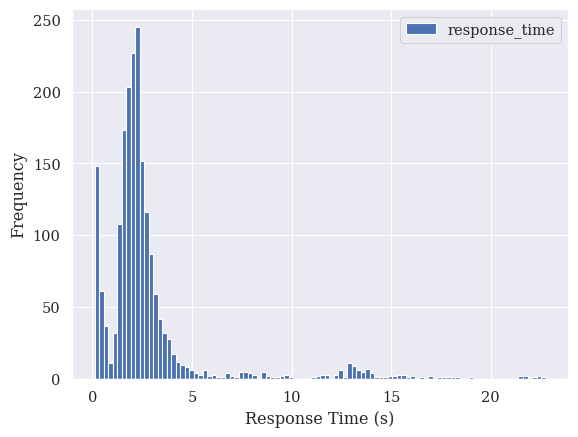

In [6]:
data = (
    session.query(ImageCreationRequest.response_time)
        .filter(ImageCreationRequest.success == False)
)
df = query_to_df(data)

# Plot a histogram of the response times
df.plot.hist(bins=100)\
    .set(xlabel='Response Time (s)')

### Custom Functions
You can then run custom functions, such as calculating the norm or cosine similarity between vectors.

In [7]:
data = session.query(
    sql_encode(ModerationRequest.prompt_hash, 'hex').label('prompt_hash'),
    sql_norm(ModerationRequest.category_scores).label('norm_of_scores'),
    slq_similarity(ModerationRequest.category_scores, ModerationRequest.category_scores).label('similarity')
).limit(10)
query_to_df(data)

,prompt_hash,norm_of_scores,similarity
0,899a3f7aa10ec67f35fc9deda5a795509a9bdd23a03bb5...,0.24688125064490275735401600574529503112654480,1.0
1,9f3a475e50a9774a089ff91a71868744cc0936df952b87...,0.56500088980062926653671599426996282624919374,1.0
2,e7e5739301fe6e9078366401ae03c01a1fcf0825014cba...,0.99855046317119619194563572155936746879790472,1.0
3,8d6297bcddf173fd8bbb137cdeb4aa4fa971994014885d...,0.99940867154461491247869713512565898889989643,1.0
4,029c70e6195d021b0ccc0b75d4589eefb021ce5bdb17b1...,0.99678528945856633035447547689482491407727898,1.0
5,6b663a5fed8778bce7db70656ec41268c9ff281ac53829...,0.9958562667905920672790700672989303144905396412,1.0
6,5b78dc0e9ed0cebbd524bb72beed27e453c05a5c077baa...,0.9916765220858360076214339403511686457469025645,1.0
7,78b25d799c34179049aee3d89cd80f8f3174589dc1329d...,0.99471638105006853881778612128193687239468866,1.0
8,fc4805ad97da815d1723c50a2f6229340cba66aad424ae...,0.9767604748099774806183128411356423705628292066,1.0
9,894104079e00afa6ba0b230a125687883d551faa519071...,0.98839794396203533365961219979526891728896261,1.0
